# 라이브러리 환경

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  
print("시드 고정: ", SEED)

시드 고정:  12


# 데이터 전처리

In [3]:
# skleran 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape, y_data.shape)

(506, 13) (506,)


In [17]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# 학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


# 신경망 학습

In [ ]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input=13)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 0s - loss: 562.7947 - mae: 21.8309
Epoch 2/100
13/13 - 0s - loss: 488.1955 - mae: 19.9646
Epoch 3/100
13/13 - 0s - loss: 338.0201 - mae: 15.5721
Epoch 4/100
13/13 - 0s - loss: 152.8982 - mae: 9.5517
Epoch 5/100
13/13 - 0s - loss: 126.4297 - mae: 8.8710
Epoch 6/100
13/13 - 0s - loss: 97.8464 - mae: 7.3805
Epoch 7/100
13/13 - 0s - loss: 80.5298 - mae: 6.6845
Epoch 8/100
13/13 - 0s - loss: 67.3773 - mae: 6.0351
Epoch 9/100
13/13 - 0s - loss: 59.2237 - mae: 5.5133
Epoch 10/100
13/13 - 0s - loss: 54.0707 - mae: 5.2915
Epoch 11/100
13/13 - 0s - loss: 50.3197 - mae: 4.9420
Epoch 12/100
13/13 - 0s - loss: 47.6906 - mae: 4.9179
Epoch 13/100
13/13 - 0s - loss: 44.1344 - mae: 4.6512
Epoch 14/100
13/13 - 0s - loss: 41.4653 - mae: 4.5394
Epoch 15/100
13/13 - 0s - loss: 38.6853 - mae: 4.4396
Epoch 16/100
13/13 - 0s - loss: 36.0622 - mae: 4.1782
Epoch 17/100
13/13 - 0s - loss: 33.4998 - mae: 4.1391
Epoch 18/100
13/13 - 0s - loss: 31.2290 - mae: 3.8386
Epoch 19/100
13/13 - 0s - los

In [ ]:
# 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 11.9346 - mae: 2.5706


[11.93463134765625, 2.5706279277801514]

# 교차 검증

In [ ]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200,
                    validation_split=0.25, verbose=2)

Epoch 1/200
10/10 - 0s - loss: 566.7573 - mae: 21.9385 - val_loss: 515.1504 - val_mae: 20.7047
Epoch 2/200
10/10 - 0s - loss: 503.1967 - mae: 20.4027 - val_loss: 426.7216 - val_mae: 18.3588
Epoch 3/200
10/10 - 0s - loss: 380.5531 - mae: 16.9985 - val_loss: 269.0835 - val_mae: 13.3364
Epoch 4/200
10/10 - 0s - loss: 203.0931 - mae: 11.1510 - val_loss: 125.0759 - val_mae: 8.5931
Epoch 5/200
10/10 - 0s - loss: 129.1895 - mae: 8.9223 - val_loss: 121.8186 - val_mae: 8.9673
Epoch 6/200
10/10 - 0s - loss: 105.4088 - mae: 7.8732 - val_loss: 87.9445 - val_mae: 7.0101
Epoch 7/200
10/10 - 0s - loss: 89.8491 - mae: 6.8246 - val_loss: 74.3090 - val_mae: 6.2348
Epoch 8/200
10/10 - 0s - loss: 76.7941 - mae: 6.4276 - val_loss: 63.4918 - val_mae: 6.2655
Epoch 9/200
10/10 - 0s - loss: 67.2318 - mae: 5.9897 - val_loss: 55.6388 - val_mae: 5.4379
Epoch 10/200
10/10 - 0s - loss: 61.5730 - mae: 5.5181 - val_loss: 50.3621 - val_mae: 5.0067
Epoch 11/200
10/10 - 0s - loss: 56.6806 - mae: 5.3517 - val_loss: 46.70

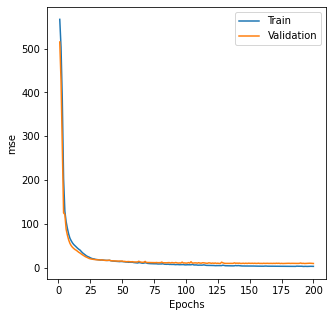

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1), 
             history.history['loss'][start-1:total_epoch], 
             label='Train')
    plt.plot(range(start, total_epoch + 1), 
             history.history['val_loss'][start-1:total_epoch], 
             label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

plot_loss_curve(total_epoch=200, start=1)

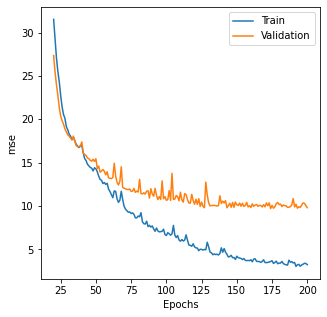

In [ ]:
plot_loss_curve(total_epoch=200, start=20)